In [1]:
%load_ext autoreload
%autoreload 2  

In [2]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.interpolate import pchip_interpolate

from hessems import lowpass

%matplotlib widget

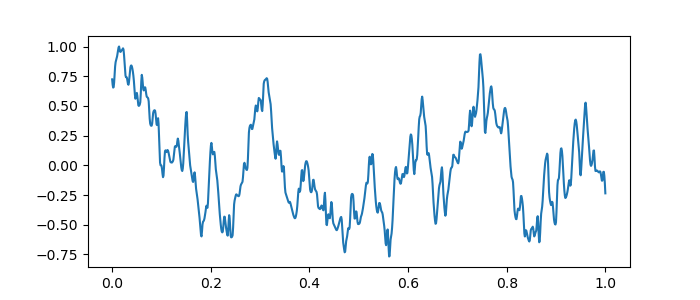

In [28]:
# Random Time Series
x = np.linspace(0, 1, 1000)
y = np.zeros(x.size)
periods = [2, 4, 7, 10, 20, 50, 100, 300]
amps = [0.2, 0.5, 1, 1, 1, 0.5, 0.5, 0.2]
rng = np.random.default_rng(seed=1)
for p, a in zip(periods, amps):
    samples = rng.random((p,))*a
    ysub = pchip_interpolate(np.linspace(0, 1, p), samples, x)
    y += ysub
y -= np.mean(y)
y /= np.max(np.abs(y))

fig, ax = plt.subplots(1, 1, figsize=(7,3))
ax.plot(x, y)

In [29]:
def sim(power_in, epeak=None, para=None):
    dtime = 1
    last_filt = 0.5
    base = np.zeros(power_in.size)
    peak = np.zeros(power_in.size)
    if epeak is None:
        epeak = np.linspace(0, 1, power_in.size)
    for step, (y, ep) in enumerate(zip(power_in, epeak)):
        b, p, last_filt = lowpass.lowpass(y, dtime, last_filt, ep, para)
        base[step] = b
        peak[step] = p
    return base, peak

Text(0.5, 0.98, 'Cols: fcuts  |  Rows: gains')

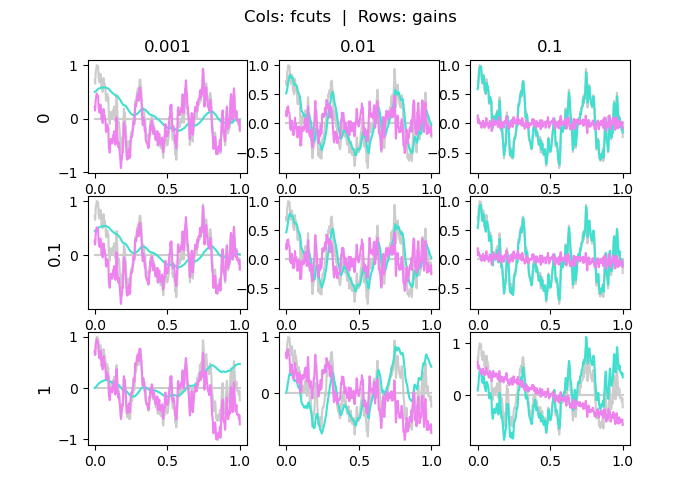

In [33]:
cuts = (1e-3, 1e-2, 1e-1)
gains = (0, 0.1, 1)
ref = 0.5

t = x
pin = y

fig, axs = plt.subplots(len(gains), len(cuts))
for col, cut in enumerate(cuts):
    for row, gain in enumerate(gains):
        para = {
            'gain': gain,
            'fcut': cut,
            'ref': ref
        }
        base, peak = sim(pin, para=para)
        axs[row, col].plot([0, 1], [0, 0], '0.8')
        axs[row, col].plot(t, pin, '0.8')
        axs[row, col].plot(t, base, 'turquoise')
        axs[row, col].plot(t, peak, 'violet')

for col, tup in enumerate(cuts):
    axs[0, col].set_title(tup)
for row, tup in enumerate(gains):
    axs[row, 0].set_ylabel(tup, size='large')
fig.suptitle(f'Cols: fcuts  |  '
             f'Rows: gains')

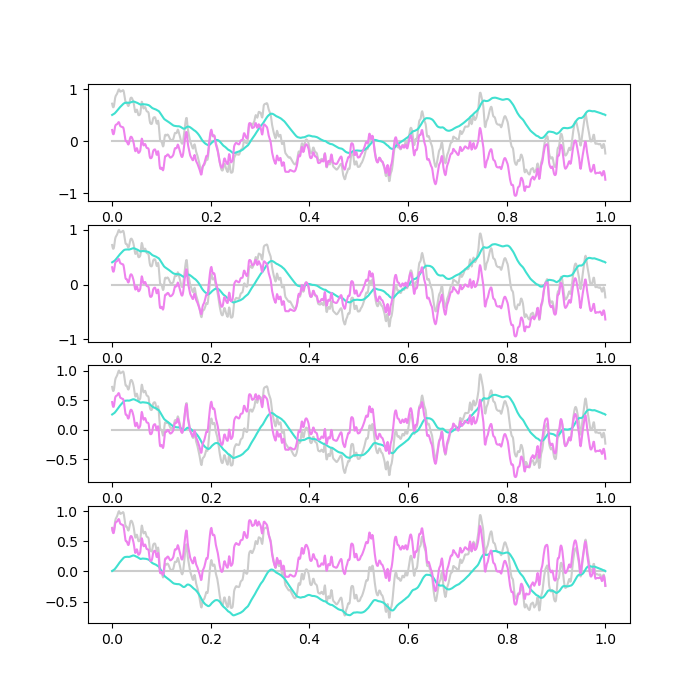

In [37]:
refs = (0, 0.2, 0.5, 1)
gain = 0.5
cut = 0.005

fig, axs = plt.subplots(len(refs), 1, figsize=(7,7))
for row, ref in enumerate(refs):
    para = {
        'gain': gain,
        'fcut': cut,
        'ref': ref
    }
    base, peak = sim(pin, para=para)
    axs[row].plot([0, 1], [0, 0], '0.8')
    axs[row].plot(t, pin, '0.8')
    axs[row].plot(t, base, 'turquoise')
    axs[row].plot(t, peak, 'violet')

for row, tup in enumerate(refs):
    axs[row].set_ylabel(tup, size='large')
fig.suptitle(f'Rows: different reference energies')

In [17]:
plt.close('all')
